# Proyecto 13

¡Enhorabuena! Has completado la sección sobre cómo hacer predicciones. Es hora de aplicar el conocimiento y las habilidades que has adquirido en un proyecto: un estudio de caso analítico real que completarás por tu cuenta.

Cuando finalices el proyecto, envía tu trabajo al revisor o la revisora de proyecto para su evaluación. Te dará su opinión en 48 horas. Utiliza los comentarios para realizar cambios y luego envía la nueva versión a la persona encargada de la revisión.

Puede que recibas aún más feedback en la nueva versión. Esto es totalmente normal. Es común pasar por varios ciclos de comentarios y revisiones.

Tu proyecto se considerará completado una vez que el revisor o la revisora del proyecto lo apruebe.
Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

### Paso 1

In [1]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
gym= pd.read_csv('gym_churn_us.csv')
gym.dropna()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Paso2. Llevar a cabo el análisis exploratorio de datos (EDA)

In [3]:
gym.columns = ['gender', 'nearness', 'partner_employee', 'promo_friends', 'phone', 'contract_period','group_sessions', 'age', 'avg_charges','months_left','lifetime','avg_week_frequency','avg_month_frequency','churn']
display(gym)
gym.info()
gym.describe()

,gender,nearness,partner_employee,promo_friends,phone,contract_period,group_sessions,age,avg_charges,months_left,lifetime,avg_week_frequency,avg_month_frequency,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               4000 non-null   int64  
 1   nearness             4000 non-null   int64  
 2   partner_employee     4000 non-null   int64  
 3   promo_friends        4000 non-null   int64  
 4   phone                4000 non-null   int64  
 5   contract_period      4000 non-null   int64  
 6   group_sessions       4000 non-null   int64  
 7   age                  4000 non-null   int64  
 8   avg_charges          4000 non-null   float64
 9   months_left          4000 non-null   float64
 10  lifetime             4000 non-null   int64  
 11  avg_week_frequency   4000 non-null   float64
 12  avg_month_frequency  4000 non-null   float64
 13  churn                4000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,nearness,partner_employee,promo_friends,phone,contract_period,group_sessions,age,avg_charges,months_left,lifetime,avg_week_frequency,avg_month_frequency,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
print('Tamaño del dataset:', gym.shape)

Tamaño del dataset: (4000, 14)


In [5]:
gym.groupby('churn')['gender'].count()

churn
0    2939
1    1061
Name: gender, dtype: int64

In [6]:
active_gym= gym[gym['churn']==0]
active_gym.describe()

,gender,nearness,partner_employee,promo_friends,phone,contract_period,group_sessions,age,avg_charges,months_left,lifetime,avg_week_frequency,avg_month_frequency,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


In [7]:
not_active_gym= gym[gym['churn']==1]
not_active_gym.describe()

,gender,nearness,partner_employee,promo_friends,phone,contract_period,group_sessions,age,avg_charges,months_left,lifetime,avg_week_frequency,avg_month_frequency,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


#### Observaciones del paso 2
No contiene ninguna característica ausente. Los géneros están balanceados, aunque los hombres lo superan por poco. Muchos de los usuarios viven cerca del establecimiento. La mitad de los usuarios trabajan en una compañia asociada. Solo el 30% usó la promoción de amigos, la mayoria si dejan sus números de telefono, eligen el periodo de 6 meses al menos un 75% de ellos. Solo el 41% está interesado en las visitas grupales, sus edades se encuentran entre 18 a 41 años de edad teniendo una media de 29. Los usuarios gastan en promedio 146 más, el máximo llega a ser de 552 y el mínimo de 0.14. Los meses de contratación y los meses para que terminen su contrato tienen valores muy similares. Por el tiempo en el que han estado los usuarios pareciera que muchos solo usan sus meses y luego se van. Muchos de los usuarios llegan de 1 a 2 veces por semana. El 26% son las personas que han dejado de llegar al gimnacio. 

Las personas que ya no llegaron solo el 35% de ellos trabaja en una compañia asociada mientras que las que están activas el 53% trabaja en las compañias asociadas. El 35% usó la promocion de amigos en las que siguen activas mientras que los demás solo fue el 18%. Las personas que siguen activas contrataron su membresía para 6 meses mientras que los demás unicamente para 1. Las activas tienen más visitas grupales que las otras. La edad no tiene mucha variación. Las personas que han dejado de llegar llevaban menos de 1 mes en promedio mientras que las demás llevan 4 meses en promedio. La frecuencia con la que llegan es mayor en las personas activas aunque los valores en general no parecieran tener mucha variación. 


#### 2.2
Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
    Crea una matriz de correlación y muéstrala.

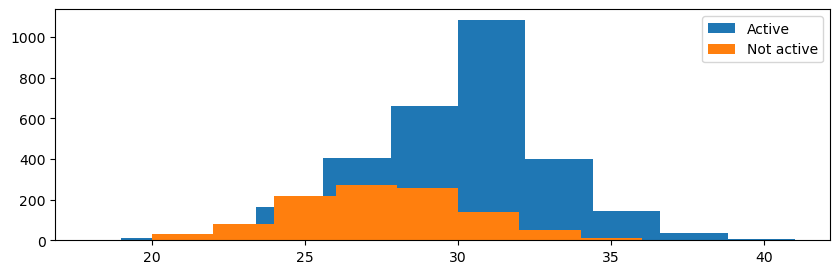

In [8]:
plt.figure(figsize=(10,3))
plt.hist(active_gym['age'],label='Active')
plt.hist(not_active_gym['age'],label='Not active')
plt.legend()



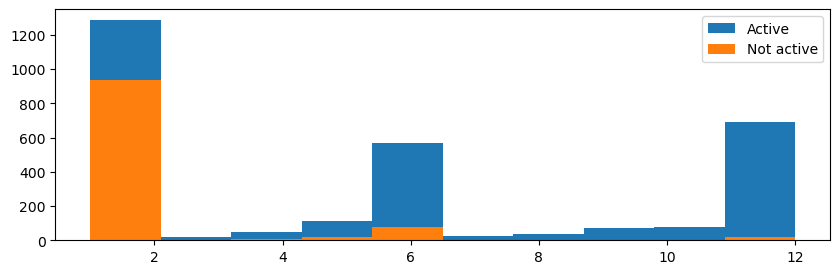

In [9]:
plt.figure(figsize=(10,3))
plt.hist(active_gym['months_left'],label='Active')
plt.hist(not_active_gym['months_left'],label='Not active')
plt.legend()


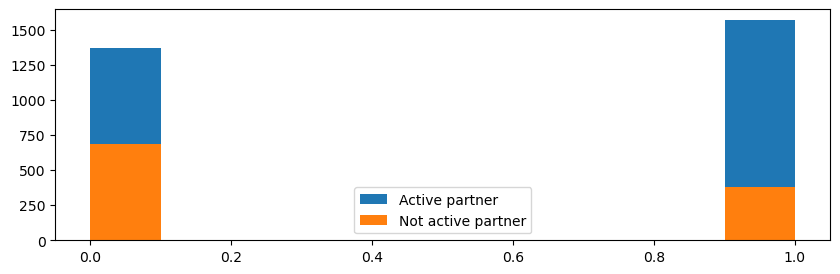

In [10]:
plt.figure(figsize=(10,3))
plt.hist(active_gym['partner_employee'],label='Active partner')
plt.hist(not_active_gym['partner_employee'],label='Not active partner')

plt.legend()


In [11]:
mean_active= active_gym.mean()
mean_active=mean_active.loc[['gender','nearness','partner_employee','promo_friends', 'phone','group_sessions']]
mean_active

gender              0.510037
nearness            0.873086
partner_employee    0.534195
promo_friends       0.353522
phone               0.903709
group_sessions      0.464103
dtype: float64

<Axes: >

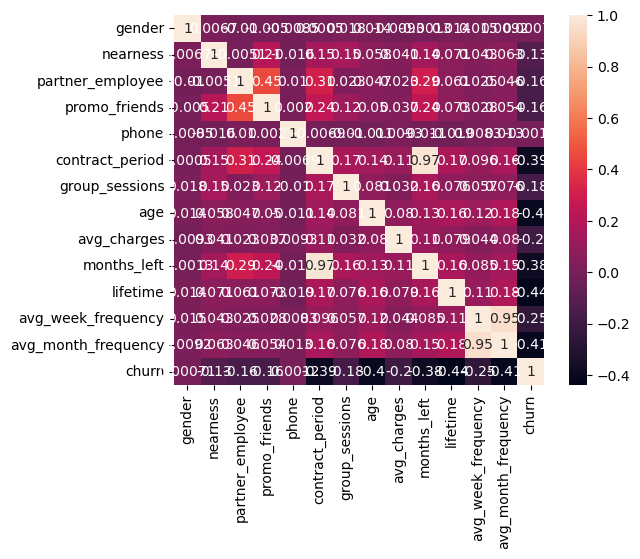

In [12]:
#Crea una matriz de correlación y muéstrala.
cm= gym.corr()
sns.heatmap(cm, annot = True, square=True)

#### 2.3 Existe una alta correlación entre los meses restantes con eel tiempo de contratación. También entre los dias de las semanas que llegan y los dias de las semanas que llegan respecto al mes. La correlación mutua no es deseable para los modelos lineales, es importante tenerlo en cuenta.

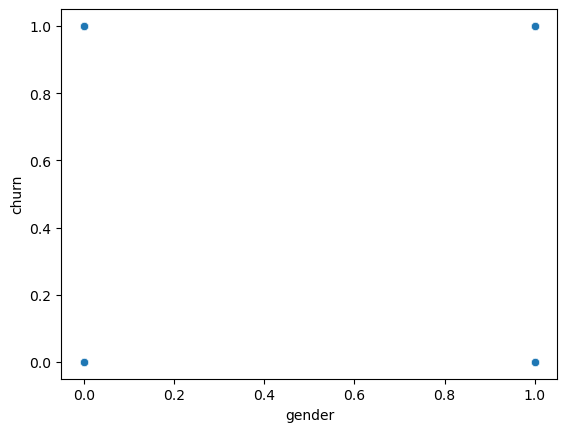

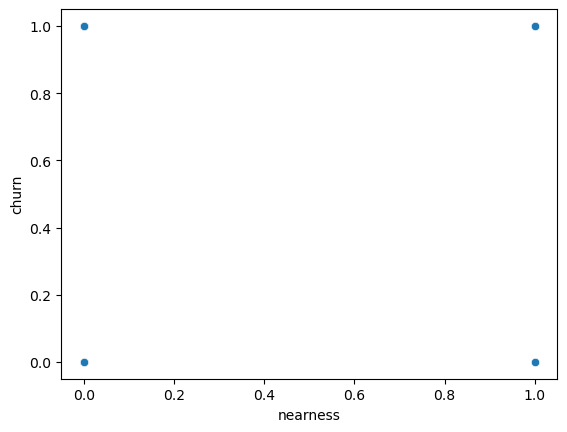

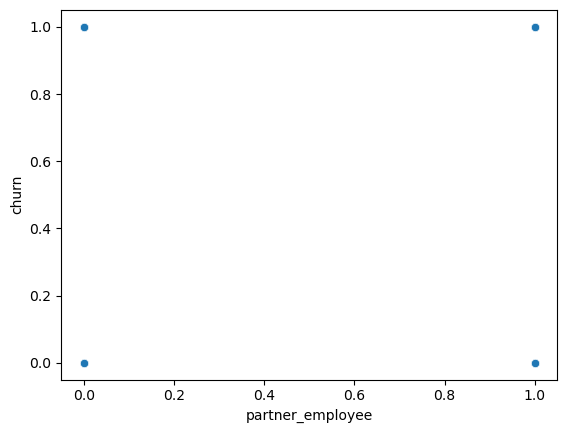

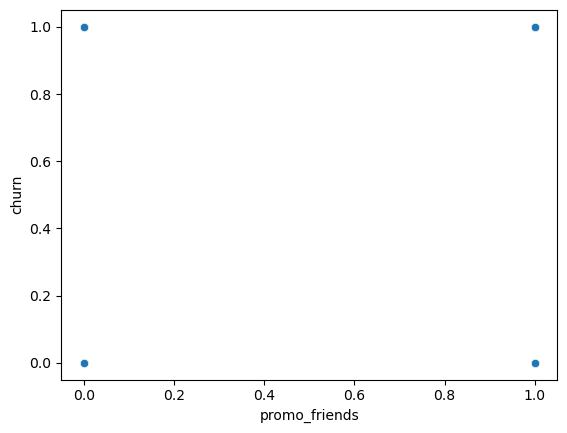

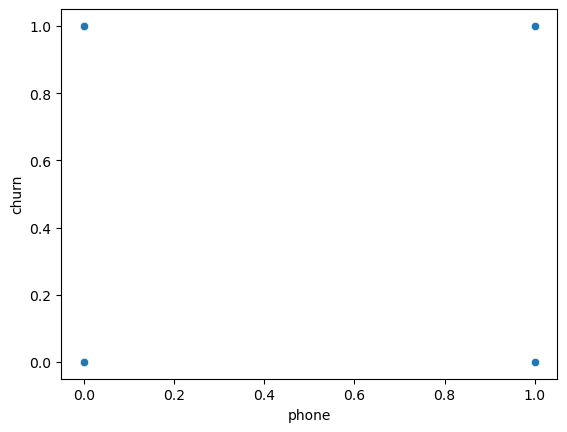

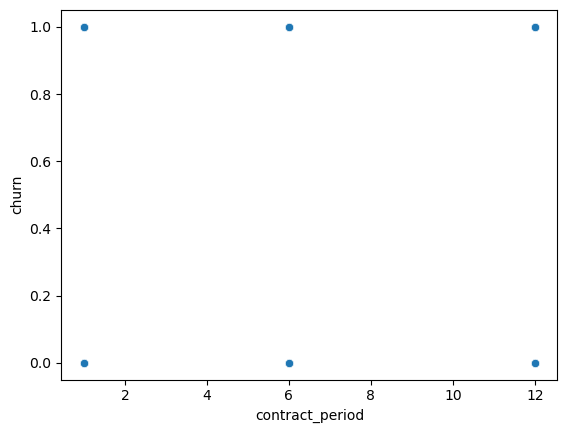

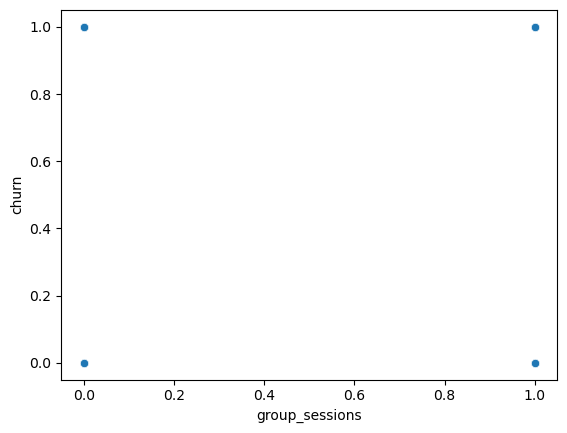

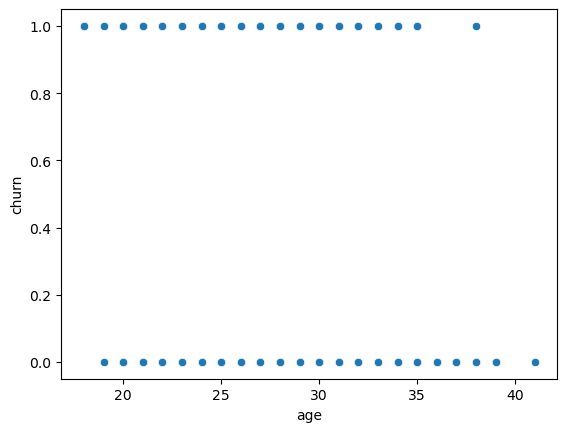

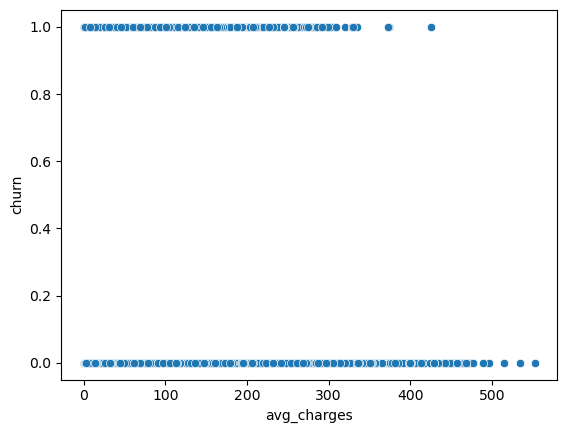

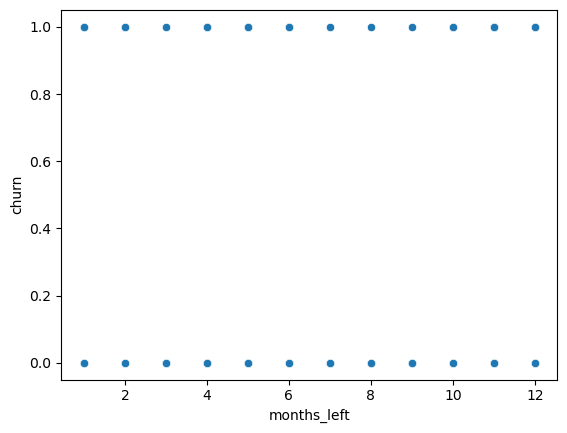

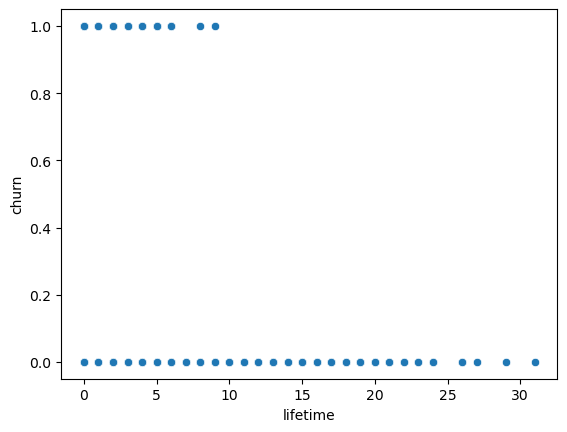

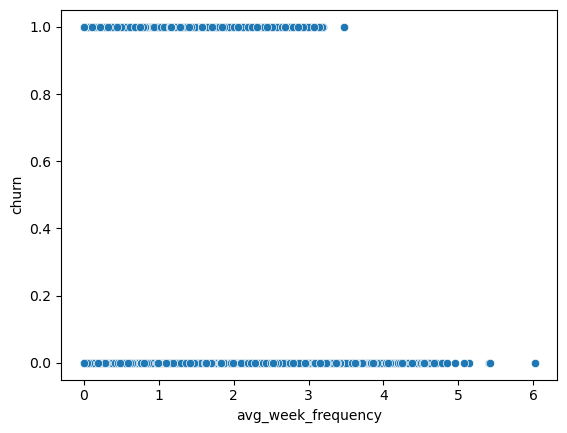

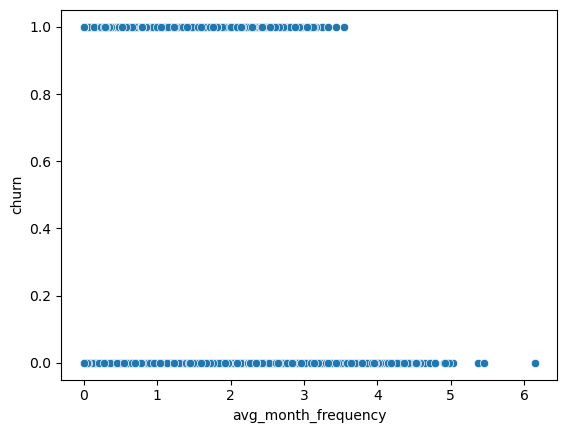

In [13]:
for col in gym.drop('churn', axis=1).columns:
    sns.scatterplot(x=gym[col],y=gym['churn']) # escribe tu código aquí
    plt.show()

### Paso 3. Construir un modelo para predecir la cancelación de usuarios

In [14]:
# Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
#Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística; bosque aleatorio.
#Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos.
#¿Qué modelo dio mejores resultados?
X = gym.drop('churn', axis = 1)
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print('Métricas de regresión logística')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))


Métricas de regresión logística
Accuracy: 0.91
Precision: 0.82
Recall: 0.80


C:\Users\Emilia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se usó train_test_split porque es una división aleatoria que no tiene relación con datos históricos. 

In [15]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]

print('Métricas del árbol de decisión')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))

Métricas del árbol de decisión
Accuracy: 0.90
Precision: 0.79
Recall: 0.80


Regresión Logística

    Accuracy (0.91): Esto significa que el modelo de regresión logística clasifica correctamente el 91% de las muestras. Es una medida general de cuántos ejemplos fueron clasificados correctamente.

    Precision (0.82): El 82% de las predicciones positivas son correctas. La precisión indica el porcentaje de verdaderos positivos entre los ejemplos que el modelo ha clasificado como positivos.

    Recall (0.80): El 80% de los ejemplos positivos reales fueron detectados correctamente por el modelo. El recall es crucial cuando el costo de un falso negativo es alto.

Árbol de Decisión

    Accuracy (0.90): El árbol de decisión clasifica correctamente el 90% de las muestras. Aunque es ligeramente inferior a la regresión logística, sigue siendo bastante alta.

    Precision (0.79): La precisión del árbol de decisión es del 79%, lo que significa que el 79% de las predicciones positivas son correctas. Esto es un poco inferior a la precisión de la regresión logística, lo que indica que el árbol de decisión tiene más falsos positivos.

    Recall (0.80): El recall del árbol de decisión es igual al de la regresión logística, con un 80%. Esto indica que ambos modelos son igualmente buenos para identificar los ejemplos positivos reales.

Interpretación y Comparación

    Accuracy: Ambos modelos tienen una precisión similar, con la regresión logística ligeramente superior (0.91 vs 0.90). Esto sugiere que ambos modelos son efectivos en general, pero la regresión logística tiene una ligera ventaja.

    Precision: La regresión logística tiene una precisión superior (0.82 vs 0.79). Esto indica que la regresión logística es mejor para evitar falsos positivos.

    Recall: Ambos modelos tienen el mismo recall (0.80). Esto significa que son igualmente buenos para identificar todos los positivos verdaderos. Si es crucial no perder positivos verdaderos, ambos modelos serían igualmente efectivos.

### Paso 4. Crear clústeres de usuarios/as

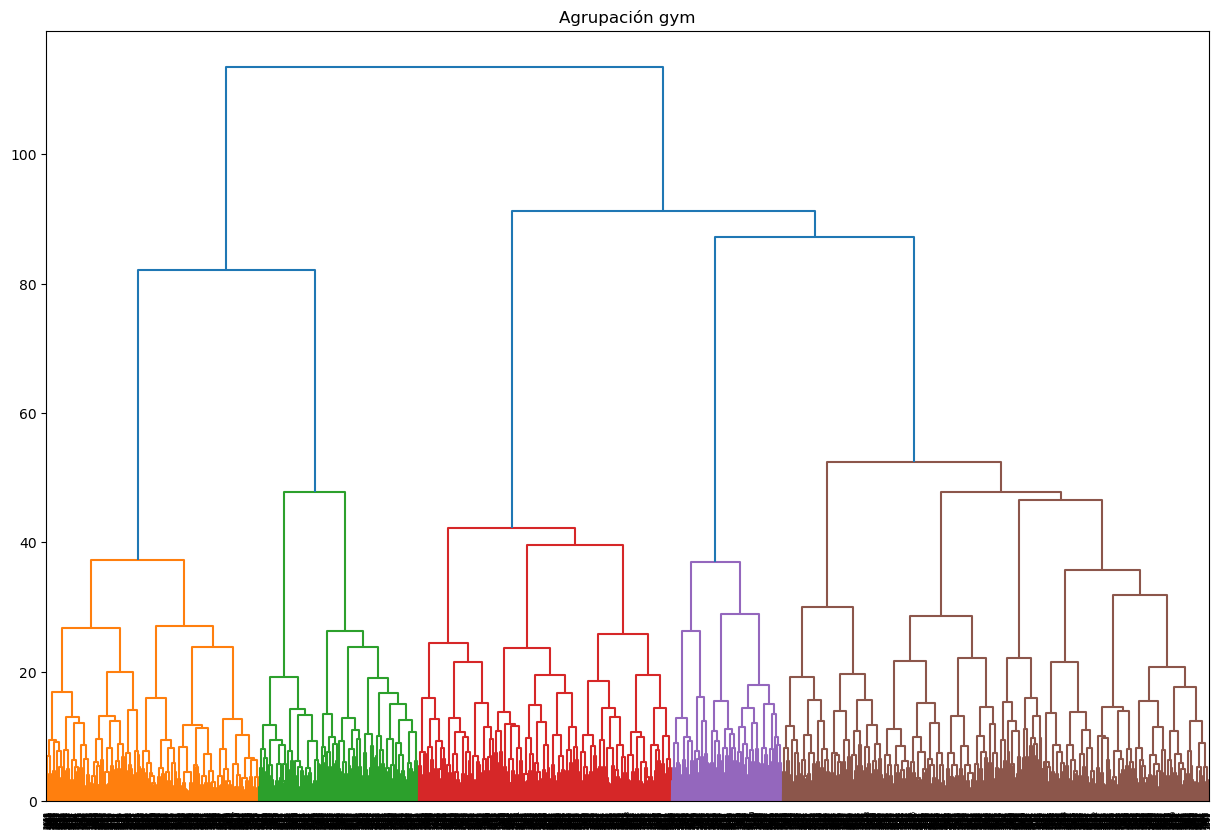

In [16]:
#Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.
# Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.


sc = StandardScaler()
x_sc = sc.fit_transform(gym)
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación gym')
plt.show()

5 clusteres sugeridos 

C:\Users\Emilia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


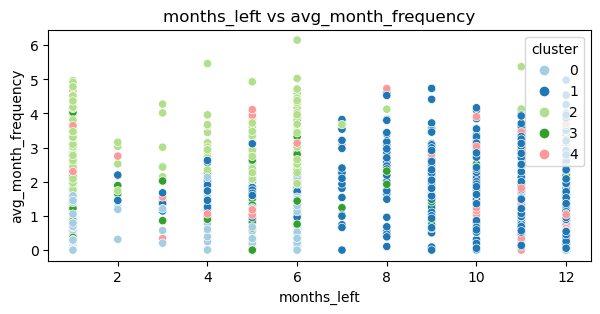

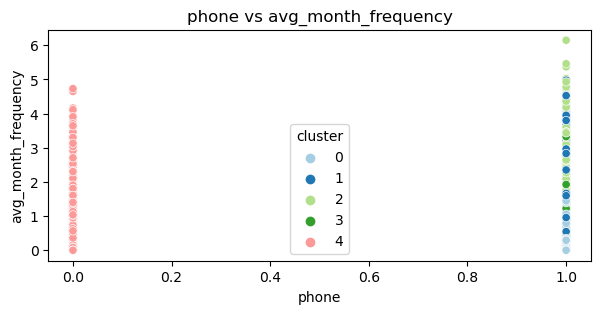

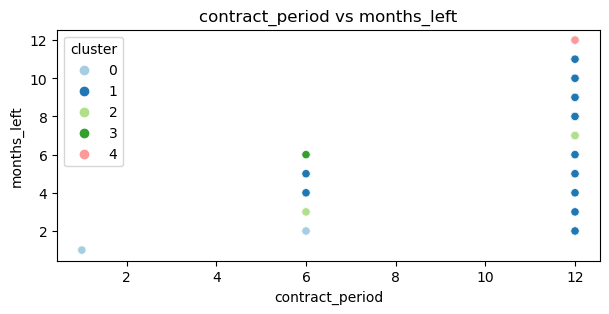

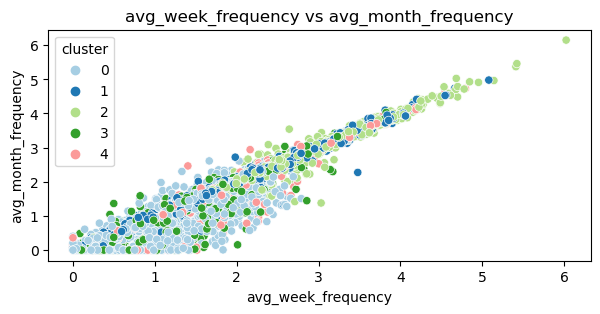

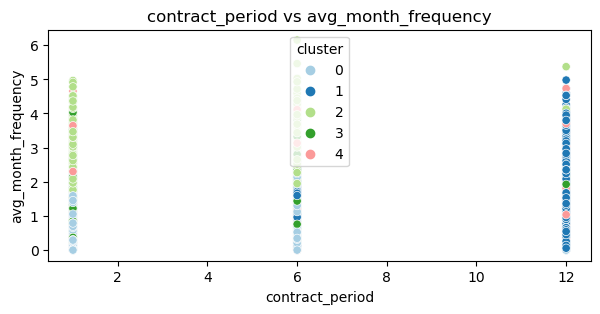

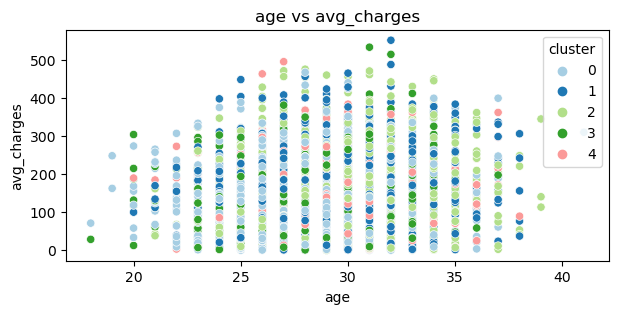

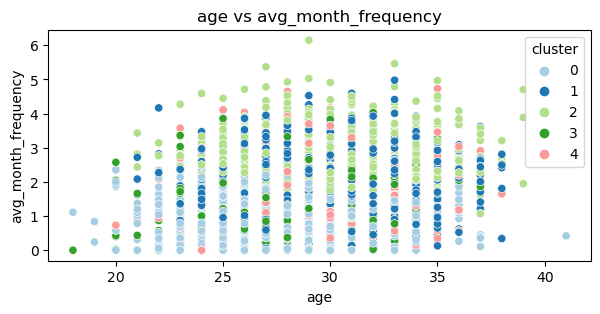

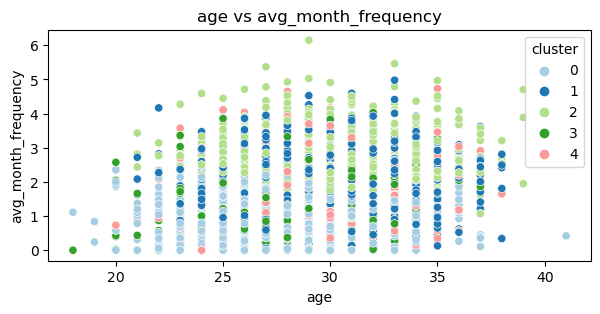

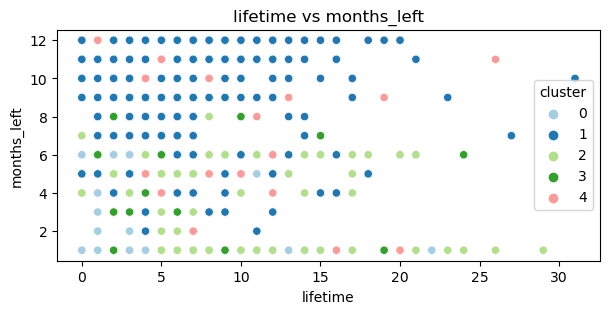

In [17]:
#Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.
#(Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado.
# Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
# Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
# Traza distribuciones de características para los clústeres. ¿Notas algo?

def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (7,3))
    sns.scatterplot(x=df[x_name], y= df[y_name],hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
sc = StandardScaler()
x_sc = sc.fit_transform(X)
km = KMeans(n_clusters = 5)
labels = km.fit_predict(x_sc)
gym['cluster'] = labels
gym.groupby(['cluster']).mean()

show_clusters_on_plot(gym, 'months_left', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'phone', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'contract_period', 'months_left','cluster')
show_clusters_on_plot(gym, 'avg_week_frequency', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'contract_period', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'age', 'avg_charges','cluster')
show_clusters_on_plot(gym, 'age', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'age', 'avg_month_frequency','cluster')
show_clusters_on_plot(gym, 'lifetime', 'months_left','cluster')




    Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

Existe una clasificación en la cantidad de meses que faltan, el cluster 2 con el 4 y el cluster 0 tienen una división. Las veces que más llegan es cuando tienen 1,6 o 12 meses restantes o sea, al momento que contratan su membresía es cuando llegan mas veces. 
El cluster 1 no deja su telefono y pareciera ser que llega menos veces al gymnacio a comparación del 2. Si comparamos el gráfico anterior con el segundo se podría observar que el cluster 1 esta disperso y pareciera que va al gymnacio sin depender de los meses restantes. 
En el gráfico de la frecuencia por semana y al mes es notoria la división que se formó a partir de la cantidad de veces que los usuarios llegan. Esto ya indica que existe un comportamiento distinto en las personas que llegas mas de las que no. 

El cluster 4 llega mas veces en cualquier tipo de contrato y llegan mas veces que los demás. 

La edad no es una característica principal pero existe una tendencia de que en los es cuando gastan más y tambien está relacionado a la cantidad de veces que llegan por semana. Mientras más edad hay quienes llegan con mas frecuencia sin caer en ningún cluster. 

Según la tasa de cancelación el cluster no.1 tiene la tasa de cancelación más baja, seguido del no.2. Comparando estos clusters con lo gráficos anteriores se puede notar que la la diferencia más evidente existe en la cantidad de meses que les quedan o que contrataron. Ellos no tienen una patrón en cuanto a la cantidad de veces que llegan como puede que lleguen 1 dia pueden llegar hasta 6 veces por semana. Las personas que contrataron el paquete de 12 meses son las personas que tienen menos de 1 año en el gymnacio. 

El cluster que tiene la tasa más alta de cancelación son quienes llegan menos veces al gimnacio, su tiempo de contratación está entre 1 - 6 meses y su lifetieme está dentro de los 6 meses. 

In [18]:
rate= gym[gym['churn']==1]
rate= rate.groupby('cluster')['phone'].count().reset_index()
cancellation = gym.groupby('cluster')['churn'].count().reset_index()

cancelation_rate= rate['phone']/cancellation['churn']
cancelation_rate

0    0.521492
1    0.027805
2    0.072664
3    0.441815
4    0.266839
dtype: float64

### Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Conclusiones

    Existe un patrón de asistencia según la membresía que contrataron, los datos revelan una clasificación clara en cuanto a la cantidad de meses que restan en la membresía.Esto indica que los usuarios tienden a ser más activos al inicio y en momentos clave de su contrato.

    El clúster 1 muestra un comportamiento diferente en comparación con los demás clústeres. Los usuarios de este grupo no suelen dejar su número de teléfono y parecen asistir al gimnasio de manera más irregular, sin un patrón claro relacionado con los meses restantes en su membresía. Esto podría representar el 26% de cancelación

    Existe una clara división en la frecuencia de asistencia semanal y mensual entre los clústeres. El clúster 4 destaca por asistir más frecuentemente, independientemente del tipo de contrato que tengan. Esto sugiere que este grupo tiene una alta motivación y utiliza su membresía de manera más intensiva.

    Aunque la edad no es un factor principal en la clasificación de los clústeres, se observa una tendencia en la que los usuarios más jóvenes tienden a gastar más y asisten más frecuentemente. Los usuarios de mayor edad que asisten con más frecuencia no están agrupados en un clúster específico, lo que indica una diversidad en los patrones de asistencia entre diferentes edades.

Recomendaciones

    Estrategia de retención durante los primeros meses.Dado que los usuarios tienden a asistir más al inicio y en momentos clave de su contrato, se recomienda implementar programas de bienvenida y recordatorios periódicos para mantener alta la motivación durante todo el año de membresía. Ofrecer incentivos específicos al renovar o acercarse a los meses críticos puede ayudar a mantener la asistencia.

    Mejorar la Comunicación con el Clúster 1:Como el clúster 1 no deja su teléfono y muestra un patrón de asistencia irregular, se recomienda explorar otros medios de comunicación, como correos electrónicos o notificaciones con una app que pueden descarga del gimnasio. Además, ofrecer programas de fidelización y seguimiento personalizado podría ayudar a aumentar su compromiso.

    Enfocarse en usuarios frecuentes: Dado que el clúster 4 asiste con mayor frecuencia, es beneficioso identificar y priorizar a estos usuarios para ofrecerles beneficios adicionales, eventos exclusivos o programas de referencia. Mantener a estos usuarios satisfechos y comprometidos puede mejorar la retención general.

    Segmentación por edad: Observando que los usuarios más jóvenes tienden a gastar más y asistir más frecuentemente, se pueden diseñar ofertas y programas específicos para atraer y retener a este segmento. Asimismo, entender que los usuarios mayores pueden tener diferentes necesidades y motivaciones puede ayudar a crear programas inclusivos que fomenten la asistencia regular entre todas las edades.